# Cancer_Prediction_MLP 

Note: All the hyperparameter tuning cells are commented, it take multiple hours to obtain the best parameters.

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

from skopt import BayesSearchCV

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.shape

(569, 33)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

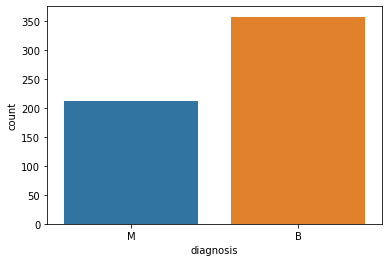

In [7]:
sns.countplot(x = data['diagnosis'],label="Count")

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
print("Number of zero entries in columns:")
for field in data.columns:
    amount = np.count_nonzero(data[field] == 0)
    
    if amount > 0:
        print('{} : {}'.format(field, amount))

Number of zero entries in columns:
concavity_mean : 13
concave points_mean : 13
concavity_se : 13
concave points_se : 13
concavity_worst : 13
concave points_worst : 13


In [10]:
#Using only the useful features and taking the prediction value 'diagnosis separately'
feature_names = data.columns[2:-1]
X = data[feature_names]
y = data.diagnosis

In [11]:
print(data.shape)
print(X.shape)
print(y.shape)

(569, 33)
(569, 30)
(569,)


In [12]:
#Changing the strings 'M' to 1 and 'B' to 0 in variable y for prediction
class_le = LabelEncoder()
y = class_le.fit_transform(data.diagnosis.values)

In [13]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size=0.30)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


# Hyperparameter tuning

# GridSearchCV

In [14]:
# pipe = Pipeline(steps=[('preprocess', StandardScaler()), ('classification', MLPClassifier())])

# preprocess = [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]
# activation = ['identity', 'logistic', 'tanh', 'relu']
# solver = ['lbfgs', 'sgd', 'adam']
# alpha = [0.0001, 0.001, 0.01, 0.1, 1]
# learning_rate = ['constant', 'invscaling', 'adaptive']
# max_iter = range(1000, 10000, 1000)
# random_state = [1]

# param_grid = [
#     {
#         'preprocess': preprocess,
#         'classification__activation': activation,
#         'classification__solver': solver,
#         'classification__alpha': alpha,
#         'classification__learning_rate' : learning_rate,
#         'classification__max_iter': max_iter,
#         'classification__random_state': random_state    
#     }
# ]

In [15]:
# k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# grid_cv = GridSearchCV(
#     pipe,
#     param_grid = param_grid,
#     cv = k_fold,
#     scoring = 'f1',
#     n_jobs = -1,
#     verbose = 2
# )

# grid_cv.fit(X, y)

# print("Best hyperparameters: ", grid_cv.best_params_)
# print("Best F1 score: ", grid_cv.best_score_ * 100)

# BayesSearchCV

In [16]:
# pipe = Pipeline([('preprocess', StandardScaler()), ('classification', MLPClassifier())])

# search_spaces = {
#     'preprocess' : [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()],
#     'classification__activation': ['identity', 'relu', 'logistic', 'tanh'],
#     'classification__solver' : ['lbfgs', 'sgd', 'adam'],
#     'classification__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
#     'classification__learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'classification__max_iter': list(range(1000, 10000, 1000)),
#     'classification__random_state': [2]
# }

In [17]:
# k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# bayes_cv = BayesSearchCV(
#     pipe,
#     search_spaces,
#     cv=k_fold,
#     scoring='f1',
#     n_jobs=-1
# )

# bayes_cv.fit(X, y)

# print("Best hyperparameters: ", bayes_cv.best_params_)
# print("Best F1 score: ", bayes_cv.best_score_ * 100)

# Predictions

In [18]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

'''class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, 
solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]'''

MLP = MLPClassifier(max_iter = 500, random_state = 1)

MLP.fit(X_train_scaler, y_train)

MLP_predict = MLP.predict(X_test_scaler)
MLP_predict_proba = MLP.predict_proba(X_test_scaler)[:, 1]

print("**MLP using the Standard Version from sklearn outputs:**")
print('MLP Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_predict) * 100))
print('MLP ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_predict_proba) * 100))
print('MLP Classification report:\n\n', classification_report(y_test, MLP_predict))
print('MLP Training set score: {:.2f}%'.format(MLP.score(X_train_scaler, y_train) * 100))
print('MLP Testing set score: {:.2f}%'.format(MLP.score(X_test_scaler, y_test) * 100))

print('--------------------------------------------------------------')

MLP_grid = MLPClassifier(max_iter=1000, alpha=1, activation='relu', solver='adam', random_state=1)

MLP_grid.fit(X_train_scaler, y_train)

MLP_grid_predict = MLP_grid.predict(X_test_scaler)
MLP_grid_predict_proba = MLP_grid.predict_proba(X_test_scaler)[:, 1]

print("**MLP using GridSearchCV parameters outputs:**")
print('MLP_grid Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_grid_predict) * 100))
print('MLP_grid ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_grid_predict_proba) * 100))
print('MLP_grid Classification report:\n\n', classification_report(y_test, MLP_grid_predict))
print('MLP_grid Training set score: {:.2f}%'.format(MLP_grid.score(X_train_scaler, y_train) * 100))
print('MLP_grid Testing set score: {:.2f}%'.format(MLP_grid.score(X_test_scaler, y_test) * 100))

print('--------------------------------------------------------------')

MLP_BO = MLPClassifier(max_iter=2000, alpha=0.0001, activation='logistic', solver='adam', random_state=1)

MLP_BO.fit(X_train_scaler, y_train)

MLP_BO_predict = MLP_BO.predict(X_test_scaler)
MLP_BO_predict_proba = MLP_BO.predict_proba(X_test_scaler)[:, 1]

print("**MLP using BayesSearchCV parameters outputs:**")
print('MLP_BO Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_BO_predict) * 100))
print('MLP_BO ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_BO_predict_proba) * 100))
print('MLP_BO Classification report:\n\n', classification_report(y_test, MLP_BO_predict))
print('MLP_BO Training set score: {:.2f}%'.format(MLP_BO.score(X_train_scaler, y_train) * 100))
print('MLP_BO Testing set score: {:.2f}%'.format(MLP_BO.score(X_test_scaler, y_test) * 100))

**MLP using the Standard Version from sklearn outputs:**
MLP Accuracy: 95.91%
MLP ROC AUC: 99.53%
MLP Classification report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

MLP Training set score: 100.00%
MLP Testing set score: 95.91%
--------------------------------------------------------------
**MLP using GridSearchCV parameters outputs:**
MLP_grid Accuracy: 96.49%
MLP_grid ROC AUC: 99.54%
MLP_grid Classification report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg     

# Dimensionality Reduction

# MLP Funnel

In [19]:
# pipe = Pipeline(steps=[('preprocess', StandardScaler()), ('classification', MLPClassifier(max_iter = 1000))])

# hidden_layer_sizes = [(32, 16, 8), (64, 32, 16), (128, 64, 32), (256, 128, 64), (512, 256, 128), (1024 ,512, 256)]
# activation = ['tanh', 'relu']
# solver = ['sgd', 'adam']
# alpha = [0.001, 0.01, 0.1]
# learning_rate = ['constant', 'adaptive']
# random_state = [1]

# param_grid = [
#     {
#         'classification__hidden_layer_sizes' : hidden_layer_sizes,
#         'classification__activation': activation,
#         'classification__solver': solver,
#         'classification__alpha': alpha,
#         'classification__learning_rate' : learning_rate,
#         'classification__random_state': random_state    
#     }
# ]

In [20]:
# k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# funnel_cv = GridSearchCV(
#     pipe,
#     param_grid = param_grid,
#     cv = k_fold,
#     scoring = 'f1',
#     n_jobs = -1,
#     verbose = 2
# )

# funnel_cv.fit(X, y)

# print("Best hyperparameters: ", funnel_cv.best_params_)
# print("Best F1 score: ", funnel_cv.best_score_ * 100)

In [21]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

MLP_Funnel = MLPClassifier(hidden_layer_sizes=(128, 64, 32),max_iter=1000, alpha=0.001, activation='relu', solver='sgd', random_state=1)

MLP_Funnel.fit(X_train_scaler, y_train)

MLP_grid_predict = MLP_Funnel.predict(X_test_scaler)
MLP_grid_predict_proba = MLP_Funnel.predict_proba(X_test_scaler)[:, 1]

print("**MLP_Funnel using GridSearchCV parameters outputs:**")
print('MLP_Funnel Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_grid_predict) * 100))
print('MLP_Funnel ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_grid_predict_proba) * 100))
print('MLP_Funnel Classification report:\n\n', classification_report(y_test, MLP_grid_predict))
print('MLP_Funnel Training set score: {:.2f}%'.format(MLP_grid.score(X_train_scaler, y_train) * 100))
print('MLP_Funnel Testing set score: {:.2f}%'.format(MLP_grid.score(X_test_scaler, y_test) * 100))

**MLP_Funnel using GridSearchCV parameters outputs:**
MLP_Funnel Accuracy: 97.08%
MLP_Funnel ROC AUC: 99.40%
MLP_Funnel Classification report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

MLP_Funnel Training set score: 99.50%
MLP_Funnel Testing set score: 96.49%


# SVD

In [22]:
X_svd = StandardScaler().fit_transform(X)
U, s, Vt = np.linalg.svd(X_svd)
singular_value_threshold = 0.5
k = np.argmax(s < singular_value_threshold)
X_k = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_k, y, test_size=0.3, random_state=1)

In [24]:
MLP_grid_svd = MLPClassifier(max_iter=1000, alpha=0.1, activation='logistic', solver='adam', random_state=1)

MLP_grid_svd.fit(X_train, y_train)

MLP_predict = MLP_grid_svd.predict(X_test)
MLP_predict_proba = MLP_grid_svd.predict_proba(X_test)[:, 1]

print("**MLP_grid using SVD outputs:**")
print('MLP_grid_svd Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_predict) * 100))
print('MLP_grid_svd ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_predict_proba) * 100))
print('MLP_grid_svd Classification report:\n\n', classification_report(y_test, MLP_predict))
print('MLP_grid_svd Training set score: {:.2f}%'.format(MLP_grid_svd.score(X_train, y_train) * 100))
print('MLP_grid_svd Testing set score: {:.2f}%'.format(MLP_grid_svd.score(X_test, y_test) * 100))

print('--------------------------------------------------------------')

MLP_BO_svd = MLPClassifier(max_iter=2000, alpha=0.0001, activation='logistic', solver='adam', random_state=1)

MLP_BO_svd.fit(X_train, y_train)

MLP_BO_predict = MLP_BO_svd.predict(X_test)
MLP_BO_predict_proba = MLP_BO_svd.predict_proba(X_test)[:, 1]

print("**MLP_BO using SVD outputs:**")
print('MLP_BO_svd Accuracy: {:.2f}%'.format(accuracy_score(y_test, MLP_BO_predict) * 100))
print('MLP_BO_svd ROC AUC: {:.2f}%'.format(roc_auc_score(y_test, MLP_BO_predict_proba) * 100))
print('MLP_BO_svd Classification report:\n\n', classification_report(y_test, MLP_BO_predict))
print('MLP_BO_svd Training set score: {:.2f}%'.format(MLP_BO_svd.score(X_train, y_train) * 100))
print('MLP_BO_svd Testing set score: {:.2f}%'.format(MLP_BO_svd.score(X_test, y_test) * 100))

**MLP_grid using SVD outputs:**
MLP_grid_svd Accuracy: 96.49%
MLP_grid_svd ROC AUC: 99.57%
MLP_grid_svd Classification report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

MLP_grid_svd Training set score: 98.99%
MLP_grid_svd Testing set score: 96.49%
--------------------------------------------------------------
**MLP_BO using SVD outputs:**
MLP_BO_svd Accuracy: 96.49%
MLP_BO_svd ROC AUC: 99.56%
MLP_BO_svd Classification report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted 

# Cross Validation Score

In [25]:
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

MLP = cross_val_score(
    MLP,
    X_std,
    y,
    cv=strat_k_fold,
    scoring='f1'
)

MLP_grid = cross_val_score(
    MLP_grid,
    X_std,
    y,
    cv=strat_k_fold,
    scoring='f1'
)

MLP_BO = cross_val_score(
    MLP_BO,
    X_std,
    y,
    cv=strat_k_fold,
    scoring='f1'
)

print("MLP: F1 after 10-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    MLP.mean() * 100,
    MLP.std() * 2
))

print("MLP_grid: F1 after 10-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    MLP_grid.mean() * 100,
    MLP_grid.std() * 2
))

print("MLP_BO: F1 after 10-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    MLP_BO.mean() * 100,
    MLP_BO.std() * 2
))

MLP: F1 after 10-fold cross-validation: 96.63% (+/- 0.05%)
MLP_grid: F1 after 10-fold cross-validation: 96.84% (+/- 0.05%)
MLP_BO: F1 after 10-fold cross-validation: 96.85% (+/- 0.06%)
